Curso ICC SADIO 2025
A continuación mostramos los distintos pasos del examen del Curso Introducción a la Computación Cuántica.

Un estado cuántico se representa, en su forma más general, por una matriz densidad que es positiva y de traza uno. Las matrices densidad siempre son hermitianas y sus autovalores son no negativos. Geométricamente, siempre se pueden escribir como combinaciones convexas de matrices densidad asociadas a estados puros.

Un problema que aparece a menudo es: ¿cuál es el estado que produce un cierto dispositivo? Una forma concreta de averiguar el estado, la provee la $\text{\textit{tomografía cuántica}}$. Esta metodología permite averiguar los coeficientes de la matriz densidad asociada con el estado en cuestión.

Veamos un ejemplo concreto. La matriz densidad más general de un qubit se puede escribir como:

$$\rho = \begin{pmatrix}
a & c \\
c^{\ast} & b
\end{pmatrix}$$

con a y b números reales y c un número complejo. Dado un estado puro $|\psi\rangle$, su matriz densidad asociada se construye haciendo el producto exterior "ket"-"bra": $\rho=|\psi\rangle\langle\psi|$.

$\color{blue}{\text{Ejercicio 1}}$: Explicar por qué es válida la parametrización de arriba.

In [1]:
# GLOBALES

shots_lst=10,100,1000,10000,1e7

---

### $\color{blue}{\text{Respuesta 1}}$:

para cualquier $\rho=|\psi\rangle\langle\psi|$, donde

$$\ket{\psi} = \alpha\ket{0} + \beta\ket{1} $$

$$  \rho=|\psi\rangle\langle\psi| = $$

$$ = \begin{pmatrix}
\alpha \\
\beta
\end{pmatrix} (\alpha^* \beta^* ) = $$
$$ = \begin{pmatrix}
\alpha\alpha^* & \alpha\beta^* \\
\beta\alpha^* & \beta\beta^*  \\
\end{pmatrix}$$

entonces


$$\rho = \begin{pmatrix}
{|\alpha|}^2 & \alpha\beta^* \\
(\alpha\beta^*)^* & {|\beta|}^2  \\
\end{pmatrix}$$

con la diagonal ppal siendo números reales y el resto un números complejos conjugados. QED.

---


Dado que la traza de $\rho$ tiene que ser uno, tenemos una relación entre $a$ y $b$, a saber: $b = 1-a$.

Entonces, la cantidad de parámetros (reales) independientes que definen a $\rho$ es tres (por ejemplo, $a$, y las partes real y compleja de $c$).

¿Es posible determinar estos valores experimentalmente (dada una fuente que produce estados desconocidos)?

Para responder a esa pregunta, notemos lo siguiente. Sean $\sigma_{x}$, $\sigma_{y}$ y $\sigma_{z}$ las matrices de Pauli: 

$$\sigma_{x} = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}$$

$$\sigma_{y} = \begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}$$ 

$$\sigma_{z}= \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}$$

Físicamente, estas matrices representan a las operaciones "medir el espin" en las direcciones $\hat{x}$, $\hat{y}$ y $\hat{z}$. Es importante tener en cuenta que $\sigma_{x}$, $\sigma_{y}$ y $\sigma_{z}$ se corresponden con las compuertas $X$, $Y$ y $Z$, respectivamente (discutidas durante el curso). Los valores medios de estos observables vienen dados por:

$\langle \sigma_{x}\rangle = tr(\rho\sigma_{x}) = 2\Re c$

$\langle \sigma_{y}\rangle = tr(\rho\sigma_{y}) = 2\Im c$

$\langle \sigma_{z}\rangle = tr(\rho\sigma_{z}) = 2a-1$

donde $\Re c$ y $\Im c$ son las partes reales e imaginaria de $c$, respectivamente. 

$\color{blue}{\text{Ejercicio 2}}$: Demostrar las igualdades de arriba.

---

### $\color{blue}{\text{Respuesta 2}}$:


$$ \langle\sigma_{x}\rangle = tr(\rho\sigma_{x}) =$$

$$= tr\left(\begin{pmatrix}a & c \\ c^* & 1-a\end{pmatrix}\begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}\right) =$$

$$= tr\left(\begin{pmatrix}c & a \\ 1-a & c^* \end{pmatrix}\right)= c+c^* = $$ 

$$= 2Re(c)+i(Im(c)-Im(c)) = 2Re(c)+i0 = 2Re(c) $$

---
$$ \langle\sigma_{y}\rangle = tr(\rho\sigma_{y}) =$$

$$= tr\left(\begin{pmatrix}a & c \\ c^* & 1-a\end{pmatrix}\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}\right) =$$

$$= tr\left(\begin{pmatrix}ic & -ia \\ ic^* & -ic^*\end{pmatrix}\right) = ic - ic^* = $$ 

$$= i \left( Re(c) - iIm(c) - Re(c) -iIm(c)\right) $$

$$= i \left((-2i) Im(c) \right) = $$

$$= (-1) (-2) Im(c) = 2Im(c) $$

---

$$ \langle\sigma_{z}\rangle = tr(\rho\sigma_{z}) =$$

$$= tr\left(\begin{pmatrix}a & c \\ c^* & 1-a\end{pmatrix}\begin{pmatrix}1 & 0 \\ 0 & -1 \end{pmatrix}\right) =$$

$$= tr\left(\begin{pmatrix}a & -c \\ c^* & a-1\end{pmatrix}\right) = 2a-1 $$

---

Las ecuaciones de arriba constituye un <span style="color:red"> sistema con tres ecuaciones y tres incógnitas. WTF!</span>. A partir de estas ecuaciones, podemos determinar $a$, $\Re c$ y $\Im c$. formalmente, con ellos alcanzaría para determinar la matriz densidad $\rho$ a partir de los valores medios (obtenidos experimentalmente) de $\sigma_{x}$, $\sigma_{y}$ y $\sigma_{z}$. Veamos entonces cómo funciona esto en la práctica. Para ello, usemos un simulador de computadora cuántica. Importamos las librerías necesarias, y construyamos un ejemplo de circuito cuántico, tal como vimos en clase. En lo que sigue se deben utilizar los tutoriales de Qiskit como guía:

https://qiskit.org/textbook/preface.html

Importamos NumPy y Qiskit.

In [2]:
import numpy as np
import qiskit as qk  # mejor que 'from qiskit import *'   :)


$\color{blue}{\text{Ejercicio 3}}$: Armar un circuito con un solo qubit, y aplicarle la compuerta Hadamard. Crear una memoria clásica (en la cual guardaremos los resultados de las mediciones).

### $\color{blue}{\text{Respuesta 3}}$:
---
Solución:

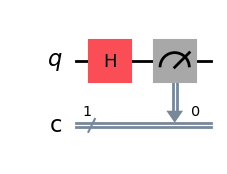

In [3]:
## Respuesta3

circ = qk.QuantumCircuit(1,1)
circ.h(0)
circ.measure(0,0)
circ.draw('mpl')


¿Cómo medir el observable $\sigma_{z}$? Qiskit supone por defecto que las mediciones se realizan en la base computacional. Así que, si queremos medir $\sigma_{z}$, sólo tenemos que agregar una medición a nuestro circuito (medimos el qubit "cero" y guardamos el resultado en la memoria "cero"):

In [4]:
# https://quantum.cloud.ibm.com/docs/es/api/qiskit/qiskit.circuit.library.HGate
h_suelta=qk.circuit.library.HGate()
h_suelta.to_matrix()

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

In [5]:
circ = qk.QuantumCircuit(1,1)
circ.h(0)
circ.measure(0,0)
circ.draw('mpl')
from qiskit_aer import AerSimulator

Ahora vamos a correr el circuito. Para ello, definimos un simulador:

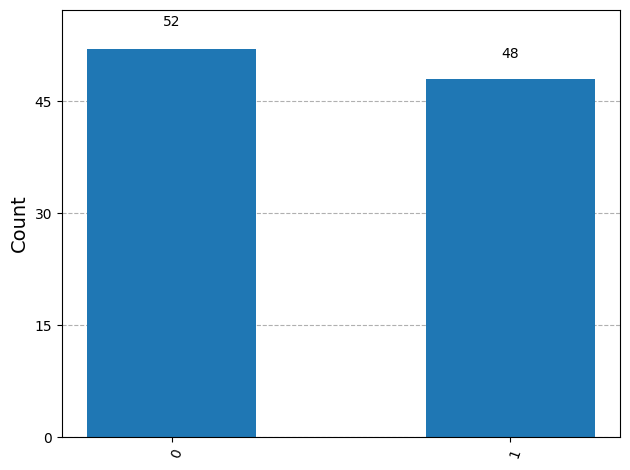

In [6]:
import qiskit_aer as qk_aer



simulador = qk_aer.AerSimulator()

counts_z = simulador.run(circ, shots = shots_lst[1]).result().get_counts()  # Hacemos la simulación corriendo el circuito en el simulador.

from qiskit.visualization import plot_histogram # Importamos herramientas de visualización.

plot_histogram(counts_z)  # Hacemos un histograma con los resultados.

In [7]:
dir(simulador)

['_AVAILABLE_DEVICES',
 '_AVAILABLE_METHODS',
 '_BASIS_GATES',
 '_CUSTOM_INSTR',
 '_DEFAULT_CONFIGURATION',
 '_SIMULATION_DEVICES',
 '_SIMULATION_METHODS',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_assemble_noise_model',
 '_basis_gates',
 '_cached_basis_gates',
 '_check_basis_gates',
 '_compile',
 '_configuration',
 '_controller',
 '_convert_binds',
 '_convert_circuit_binds',
 '_coupling_map',
 '_default_options',
 '_execute_circuits',
 '_execute_circuits_job',
 '_format_results',
 '_from_backend',
 '_get_executor',
 '_mapping',
 '_options',
 '_options_configuration',
 '_options_properties',
 

¿Cómo calcular, a partir de los datos del histograma de arriba, el valor medio de $\sigma_{z}$? Para ello, notar los siguientes hechos:

- Cada vez que obtenemos "$0$" como resultado resultado de una medición, eso corresponde al resultado $1$ del observable $\sigma_{z}$. De forma análoga, cada vez que obtenemos "$1$", eso corresponde al resultado $-1$ del observable $\sigma_{z}$.

- La frecuencia con la que obtienen el autovalor $1$ para $\sigma_{z}$ es igual al número de veces $N_{0}$ que salió el resultado "$0$" dividido el número de corridas $N$ del experimento (número de shots), es decir:

$$ P^{exp}_{1} = \frac{N_{0}}{N} $$

Análogamente, 

$$ P^{exp}_{-1} = \frac{N_{1}}{N}$$

Agregamos el supraíndice "exp" para indicar que son resultados que se obtienen a partir de correr el simulador definido arriba con un número de shots finito. Notar que el simulador de arriba no tiene ruido. Por lo tanto, sólo estamos simulando estados puros, pero con $\text{\textit{estadística finita}}$.

Utilizando las ecuaciones de arriba, se obtiene que el valor empírico (es decir, calculado a partir de las frecuencias observadas) del valor medio de $\sigma_{z}$ viene dado por:

$$ \langle\sigma_{z}\rangle_{exp} = (1)P^{exp}_{1} + (-1)P^{exp}_{-1} = P^{exp}_{1} - P^{exp}_{-1} = \frac{N_{0}}{N} - \frac{N_{1}}{N} $$

$\color{blue}{\text{Ejercicio 4}}$: Calcular $\langle\sigma_{z}\rangle_{exp}$, $P^{exp}_{1}$ y $P^{exp}_{-1}$ para distintos números de shots (es decir, para distintos valores de $N$). Por ejemplo, se podría usar $N=10$, $100$, $1000$, y $10000$. Comparar los valores obtenidos con los valores de las probabilidades y valor medio que predice la teoría, es decir, con $P_{1} = tr(\rho |0\rangle\langle 0|)$, $P_{-1} = tr(\rho |1\rangle\langle 1|)$ y $\langle\sigma_{z}\rangle = tr(\rho\sigma_{z})$. ¿Coinciden? ¿Se parecen? ¿Si/No, por qué? Elaboren las respuestas con sus propias palabras. ¿Qué pasa si N tiende a infinito?

---

## $\color{blue}{\text{Respuesta 4}}$:


In [8]:
#calculo la salida
from IPython.display import display, Math, Latex
import sympy as sp
psi=sp.Matrix([[1],[0]])
psi=sp.Matrix(qk.circuit.library.HGate().to_matrix())*psi
display(Math(r"\ket{\psi} = "+sp.latex(psi)))

#calculo la media sobre \hat{Z}
mediaSigmaZ=2*psi[0]-1 # fómula de la pregunta 2
display(Math(r'\langle\sigma_{z}\rangle = '+f"{mediaSigmaZ}"))
if abs(mediaSigmaZ) > 0.1:
    # WTF !!!
    print("-[ ] revisar... tiene que ser 0, o no???")

#calculo las proba cada autovalor de \sigma_Z
proba1=1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-[ ] revisar... tiene que ser 0, o no???


de la pregunta1:

$$\rho = \begin{pmatrix}
{|\alpha|}^2 & \alpha\beta^* \\
(\alpha\beta^*)^* & {|\beta|}^2  \\
\end{pmatrix}$$

In [9]:
contradiagonal=psi[0]*(psi[1].conjugate())
rho=sp.Matrix([[abs(psi[0])**2,
                contradiagonal],
               [contradiagonal.conjugate(),
                abs(psi[1])**2]])
display(Math(r"\rho ="+sp.latex(rho)))

<IPython.core.display.Math object>

-[ ] no debería ser cero fuera de las diagonales, pq $\ket{\psi}$ es puro y coherente?

In [10]:
# calculo P_1
ketcero=sp.Matrix([[1],[0]])
Puno=rho*(ketcero*ketcero.transpose().conjugate())  #contd. Me comí la conjugación, "sory gordo"
Puno=Puno.trace()
display(Math(r"P_1 = "+str(Puno)))

# calculo P_{-1}
ketuno=sp.Matrix([[0],[1]])
PmenosUno=rho*(ketuno*ketuno.transpose().conjugate())  #contd
PmenosUno=PmenosUno.trace()
display(Math(r"P_{-1} = "+str(Puno)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
import pandas as pd
# Calcular $\langle\sigma_{z}\rangle_{exp}$, $P^{exp}_{1}$ y $P^{exp}_{-1}$ para
df_columns=["shots", "n_1", "n_0", "sigmaZexp", "Pexp_1", "Pexp_menos1","errorPlambda1pct","errorPlambda2pct"]

#shots_lst=10,100,1000,10000,1e7
corridas=list()
for shots in shots_lst:
    _=simulador.run(circ, shots = shots).result()
    corridas.append((shots, # ver df_columns
        _.get_counts()["1"],
        _.get_counts()["0"],
        (_.get_counts()["1"]-_.get_counts()["0"])/shots,
        _.get_counts()["1"]/shots,
        _.get_counts()["0"]/shots,
        abs(_.get_counts()["1"]/shots/Puno-1)*100, # error porcentual
        abs(_.get_counts()["0"]/shots/PmenosUno-1)*100,)) # error porcentual


df = pd.DataFrame(columns=df_columns, data=corridas)
df

,shots,n_1,n_0,sigmaZexp,Pexp_1,Pexp_menos1,errorPlambda1pct,errorPlambda2pct
0,10.0,5,5,0.000000,0.500000,0.500000,2.22044604925031e-14,2.22044604925031e-14
1,100.0,54,46,0.080000,0.540000,0.460000,8.00000000000003,7.99999999999997
2,1000.0,475,525,-0.050000,0.475000,0.525000,4.99999999999998,5.00000000000003
3,10000.0,5078,4922,0.015600,0.507800,0.492200,1.56000000000003,1.55999999999997
4,10000000.0,4998483,5001517,-0.000303,0.499848,0.500152,0.0303399999999732,0.0303400000000176


Comparando los valores obtenidos en las corridas, es evidente que aumentar N (shots) baja el error (columnas "error*pct") respecto al valor teórico. Aunque entre mil y 1e4 no hay mucha diferencia, incluso el error puede subir. Recién subiendo varios órdenes de magnitud, se nota el aumento en precisión.


In [12]:
# guardo los valores para la rta7
df_rta7 = df[["shots", "sigmaZexp", "errorPlambda1pct", "errorPlambda2pct"]].copy()
df_rta7.rename(columns={"errorPlambda1pct": "errorPlambda1pct_z","errorPlambda2pct": "errorPlambda2pct_z",}, inplace=True)
df_rta7

,shots,sigmaZexp,errorPlambda1pct_z,errorPlambda2pct_z
0,10.0,0.000000,2.22044604925031e-14,2.22044604925031e-14
1,100.0,0.080000,8.00000000000003,7.99999999999997
2,1000.0,-0.050000,4.99999999999998,5.00000000000003
3,10000.0,0.015600,1.56000000000003,1.55999999999997
4,10000000.0,-0.000303,0.0303399999999732,0.0303400000000176


---
Por ahora, tenemos los resultados de las mediciones en $\sigma_{z}$. Pero, para hacer la tomografía, necesitamos también los valores medios $\langle\sigma_{x}\rangle$ y $\langle\sigma_{y}\rangle$. ¿Cómo hacemos para medir en las bases de $X$ e $Y$, es decir, en una base que no sea la computacional?

Idealmente, deberíamos rotar nuestro observable. Si estuviéramos usando un imán ---como en el experimento de Stern-Gerlach---, alcanzaría con orientarlo en las direccciones $X$ e $Y$, y proceder de forma análoga a como hicimos para la dirección $Z$. Dependiendo del modelo de computadora cuántica que estemos usando, estas rotaciones de la base de medición se pueden hacer, o no. Sin embargo, incluso si nuestra computadora sólo "colapsa" efectivamente en la base computacional (es decir, si sólo mide $\sigma_{z}$), podemos hacer lo siguiente. 

El procedimiento consiste en rotar al estado en vez del observable. Matemáticamente, esto se puede explicar así. Toda rotación de un sistema cuántico, se implementa por una matriz unitaria $U$. Si tenemos una base $B$, y queremos ir a una base $B'$, siempre va a existir una matriz unitaria que haga esa transformación. Entonces, supongamos que, en vez de $\sigma_{z}$, queremos medir $\sigma_{u} = U\sigma_{z}U^{\dagger}$ ($\sigma_{u}$ sería como el "imán rotado" en el experimento de Stern-Gerlach, apuntando en la dirección $\hat{u}$). Usando la propiedad de que la traza es cíclica (es decir, $tr(ABC)=tr(CAB)=tr(BCA)$ para matrices arbitrarias $A,B,C$), se puede probar la siguiente igualdad:

$$\langle\sigma_{u}\rangle = tr(\rho\sigma_{u}) = tr(\rho U\sigma_{z}U^{\dagger})=tr(U^{\dagger}\rho U\sigma_{z})$$

es decir, tenemos que

$$\langle\sigma_{u}\rangle = tr(\rho\sigma_{u}) = tr(\rho'\sigma_{z})$$

donde $\rho' = U^{\dagger}\rho U$. En palabras: medir el estado $\rho$ en la base rotada $u$, equivale a medir en $z$ al estado rotado $\rho'$. Utilizando este truco, podemos medir en cualquier base que queramos.


---

$\color{blue}{\text{Ejercicio 5}}$: Comprobar que las ecuaciones del procedimiento arriba indicado son ciertas. ¿Cuál es el significado físico de la equivalencia establecida?


## $\color{blue}{\text{Respuesta 5}}$:

por un lado$^{(1)}$  analizo  $tr(\rho U\sigma_{z}U^{\dagger})$ y por otro  lado$^{(2)}$ analizo  $tr(U^{\dagger}\rho U \sigma_z)$


1. analizo  $tr(\rho U\sigma_{z}U^{\dagger})$
$$ U \sigma_z U^{\dagger} == U \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} U^{\dagger} == $$
$$ == U \begin{pmatrix} {u_{11}^*} & 0 \\ 0 & -{u_{22}^*} \end{pmatrix} == $$ $$ == \begin{pmatrix} {u_{11}^*} & u_{12} \\ u_22 & -{u_{22}^*} \end{pmatrix}\begin{pmatrix} {u_{11}^*} & 0 \\ 0 & -{u_{22}^*} \end{pmatrix} == $$
$$ == \begin{pmatrix} {|u_{11}|}^* & 0 \\ 0 & -{|u_{22}|}^* \end{pmatrix} $$

 $$tr(\rho U\sigma_{z}U^{\dagger}) == {|\alpha|}^2{|u_{11}|}^2 - {|\beta|}^2{|u_{22}|}^2  $$

2. analizo  $tr(U^{\dagger}\rho U \sigma_z)$

$$ U^\dagger \rho U == U^\dagger  \begin{pmatrix}
{|\alpha|}^2 & \alpha\beta^* \\
(\alpha\beta^*)^* & {|\beta|}^2  \\
\end{pmatrix}
\begin{pmatrix} u_{11} & u_{12} \\ u_{21} & u_{22} \end{pmatrix} ==
$$

$$  == U^\dagger  \begin{pmatrix}
{|\alpha|}^2 u_{11} & \alpha\beta^* u_{12}\\
(\alpha\beta^*)^* u_{21} & {|\beta|}^2 u_{22} \\
\end{pmatrix} ==
$$

$$  ==
\begin{pmatrix} {u_{11}}^* & {u_{21}}^* \\ {u_{12}}^2 & {u_{22}}^* \end{pmatrix}
\begin{pmatrix}
{|\alpha|}^2 u_{11} & \alpha\beta^* u_{12}\\
(\alpha\beta^*)^* u_{21} & {|\beta|}^2 u_{22} \\
\end{pmatrix} ==
$$


$$  == \begin{pmatrix}
{|\alpha|}^2 {|u_{11}|}^2 & \alpha\beta^* {|u_{12}|}^2\\
(\alpha\beta^*)^* {|u_{21}|}^2 & {|\beta|}^2 {|u_{22}|}^2 \\
\end{pmatrix}
$$
$$ tr(U^{\dagger}\rho U \sigma_z) ==  {|\alpha|}^2{|u_{11}|}^2 - {|\beta|}^2{|u_{22}|}^2 = tr(\rho' \sigma_z)$$

entonces
$$ \langle \sigma_u \rangle = tr(\rho \sigma_u) == {}^{(1)} == {}^{(2)} == tr(\rho' \sigma_z)  $$
QED

El significado físico sería (S.E.U.O.) que el estado $\rho'$ tiene los mismos ángulo respecto la base de autovectores de $\sigma_z$ el Estado original respecto a la base de autovectores de $\sigma_u$.
Esto s traduce en que $\rho'$ tiene en su diagonal ppal las mismas prabilidades de el estado colapse cada elemento de base de autovectores de $\sigma_z$ que el estado original.

---



---
$\color{blue}{\text{Ejercicio 6}}$: Usando el procedimiento descripto arriba, calcular $\langle\sigma_{x}\rangle_{exp}$ y $\langle\sigma_{y}\rangle_{exp}$ para distintos números de shots y comparar con las predicciones teóricas. Es decir, repitan el Ejercicio 4 para las direcciones $x$ e $y$. ¿Notan alguna diferencia?

$\color{green}{\text{AYUDA}}$: para realizar las rotaciones que requiere el procedimiento, deben aplicar al circuito original ciertas matrices unitarias (para "rotar" el estado $\rho$). Para la dirección $x$, la rotación equivale a aplicarle al circuito una compuerta $H$ (Hadamard), y para la dirección $y$, deben aplicar lasa compuertas $S^{\dagger}$ y $H$. Calcular los valores medios de $\langle\sigma_{x}\rangle$, $\langle\sigma_{y}\rangle$ y $\langle\sigma_{z}\rangle$.




In [13]:
# vamos con \hat{x}, que San Penrose nos ayude...


from IPython.display import display, Math, Latex, display_markdown
import sympy as sp
import qiskit  as qk
import qiskit_aer as qk_aer
import numpy as np
import math

circ = qk.QuantumCircuit(1,1)
circ.h(0)
circ.h(0) #esto es simular \hat{X} ... pero va a volver a \ket{0} :/
circ.measure(0,0)
print(circ.draw())


psi=sp.Matrix([[1],[0]])
psi=sp.Matrix(qk.circuit.library.HGate().to_matrix())*psi
rho=(psi*psi.transpose().conjugate())
rho_12=rho[0,1]
mediaSigmaX=2*complex(rho_12).real # fómula de la pregunta 2

psi=sp.Matrix(qk.circuit.library.HGate().to_matrix())*psi #rotacion para \rho'
rhoRotado=(psi*psi.transpose().conjugate())
display(Math(r"\ket{\psi'} = "+sp.latex(psi)))
display("#obvio, volvió a \ket{0}")

ketcero=sp.Matrix([[1],[0]])
ketuno=sp.Matrix([[0],[1]])

PlambdaUno=rhoRotado*(ketcero*ketcero.H) #contd
PlambdaUno=PlambdaUno.trace()
display(Math(r"P_{\lambda_1} = "+str(PlambdaUno)))
PlambdaDos=rhoRotado*(ketuno*ketuno.H) #contd
PlambdaDos=PlambdaDos.trace()
display(Math(r"P_{\lambda_2} = "+str(PlambdaDos)))
display(r"-[ ] revisar: daba 2 porque me olvidé de rotar? :/")
display()
display()

     ┌───┐┌───┐┌─┐
  q: ┤ H ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 


<IPython.core.display.Math object>

'#obvio, volvió a \\ket{0}'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'-[ ] revisar: daba 2 porque me olvidé de rotar? :/'

In [14]:

import pandas as pd

df_columns=["shots", "n_1", "n_0", "sigmaXexp", "PexpLambda1", "PexpLambda2","errorPlambda1pct","errorPlambda2pct"]

#shots_lst=10,100,1000,10000,1e7
corridas=list()

simulador = qk_aer.AerSimulator()


for shots in shots_lst:
    _=simulador.run(circ, shots = shots).result()
    corridas.append((shots, # ver df_columns
        _.get_counts().get("1",0),
        _.get_counts().get("0",0),
        (_.get_counts().get("1",0)-_.get_counts().get("0",0))/shots,
        _.get_counts().get("1",0)/shots,
        _.get_counts().get("0",0)/shots,
        abs(_.get_counts().get("1",0)/shots/PlambdaUno-1)*100, # error porcentual
        abs(_.get_counts().get("0",0)/shots/PlambdaDos-1)*100,)) # error porcentual


df = pd.DataFrame(columns=df_columns, data=corridas)
df

,shots,n_1,n_0,sigmaXexp,PexpLambda1,PexpLambda2,errorPlambda1pct,errorPlambda2pct
0,10.0,0,10,-1.0,0.0,1.0,100,oo
1,100.0,0,100,-1.0,0.0,1.0,100,oo
2,1000.0,0,1000,-1.0,0.0,1.0,100,oo
3,10000.0,0,10000,-1.0,0.0,1.0,100,oo
4,10000000.0,0,10000000,-1.0,0.0,1.0,100,oo


In [15]:
# guardo sigmaXexp para la rta7
df_rta7 = df_rta7.merge(df[["shots", "sigmaXexp", "errorPlambda1pct", "errorPlambda2pct"]].copy(),
                        on="shots",
                        how="left",
                        suffixes=(None,None))
df_rta7.rename(columns={"errorPlambda1pct": "errorPlambda1pct_x","errorPlambda2pct": "errorPlambda2pct_x",}, inplace=True)

df_rta7

,shots,sigmaZexp,errorPlambda1pct_z,errorPlambda2pct_z,sigmaXexp,errorPlambda1pct_x,errorPlambda2pct_x
0,10.0,0.000000,2.22044604925031e-14,2.22044604925031e-14,-1.0,100,oo
1,100.0,0.080000,8.00000000000003,7.99999999999997,-1.0,100,oo
2,1000.0,-0.050000,4.99999999999998,5.00000000000003,-1.0,100,oo
3,10000.0,0.015600,1.56000000000003,1.55999999999997,-1.0,100,oo
4,10000000.0,-0.000303,0.0303399999999732,0.0303400000000176,-1.0,100,oo


In [16]:
#df_rta7.columns

como era de esperar, todas las mediciones colapsan al primer autovector del operador $\sigma_z$ pq las compuertas son unitarias, por lo tanto son reversibles, al rotar el estado $\rho$ con la misma H() q usamos en el circuito para obtener el $\ket{+}$ original, volvimos a $\ket{0}$

Ahora seguimos con $\hat{y}$:



In [17]:
# vamos con \hat{y}, y que San Bertrand Russell nos ilumine...


from IPython.display import display, Math, Latex, display_markdown
import sympy as sp
import qiskit  as qk
import qiskit_aer as qk_aer
import numpy as np
import math

circ = qk.QuantumCircuit(1,1)
circ.h(0)
#lo que sigue es simular \hat{Y}
circ.sdg(0) # https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.library.SdgGate
circ.h(0)
circ.measure(0,0)
print(circ.draw())


psi=sp.Matrix([[1],[0]])
psi=sp.Matrix(qk.circuit.library.HGate().to_matrix())*psi
rho=(psi*psi.transpose().conjugate())
rho_12=rho[0,1]
mediaSigmaY=2*complex(rho_12).imag # fómula de la pregunta 2

psi=sp.Matrix(qk.circuit.library.SdgGate().to_matrix())*psi #rotacion para \rho'
psi=sp.Matrix(qk.circuit.library.HGate().to_matrix())*psi #rotacion para \rho'
rhoRotado=(psi*psi.transpose().conjugate())
display(Math(r"\ket{\psi'} = "+sp.latex(psi)))

ketcero=sp.Matrix([[1],[0]])
ketuno=sp.Matrix([[0],[1]])

PlambdaUno=rhoRotado*(ketcero*ketcero.H) #contd
PlambdaUno=PlambdaUno.trace()
PlambdaUno = (rhoRotado * (ketcero * ketcero.H)).trace()
PlambdaUno = PlambdaUno.simplify()
display(Math(r"P_{\lambda_1} = "+str(PlambdaUno)))
PlambdaDos=rhoRotado*(ketuno*ketuno.H) #contd
PlambdaDos=PlambdaDos.trace()
PlambdaDos=PlambdaDos.simplify()
display(Math(r"P_{\lambda_2} = "+str(PlambdaDos)))
display()
display()
import pandas as pd

df_columns=["shots", "n_1", "n_0", "sigmaYexp", "PexpLambda1", "PexpLambda2","errorPlambda1pct","errorPlambda2pct"]
#shots_lst=10,100,1000,10000,1e7 mandado a las primeras celdas como global
corridas=list()

simulador = qk_aer.AerSimulator()


for shots in shots_lst:
    _=simulador.run(circ, shots = shots).result()
    corridas.append((shots, # ver df_columns
        _.get_counts().get("1",0),
        _.get_counts().get("0",0),
        (_.get_counts().get("1",0)-_.get_counts().get("0",0))/shots,
        _.get_counts().get("1",0)/shots,
        _.get_counts().get("0",0)/shots,
        abs(_.get_counts().get("1",0)/shots/PlambdaUno-1)*100, # error porcentual
        abs(_.get_counts().get("0",0)/shots/PlambdaDos-1)*100,)) # error porcentual


df = pd.DataFrame(columns=df_columns, data=corridas)
df

     ┌───┐┌─────┐┌───┐┌─┐
  q: ┤ H ├┤ Sdg ├┤ H ├┤M├
     └───┘└─────┘└───┘└╥┘
c: 1/══════════════════╩═
                       0 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,shots,n_1,n_0,sigmaYexp,PexpLambda1,PexpLambda2,errorPlambda1pct,errorPlambda2pct
0,10.0,2,8,-0.60000,0.200000,0.800000,60.0000000000000,60.0000000000001
1,100.0,47,53,-0.06000,0.470000,0.530000,5.99999999999996,6.00000000000005
2,1000.0,508,492,0.01600,0.508000,0.492000,1.60000000000005,1.59999999999996
3,10000.0,5116,4884,0.02320,0.511600,0.488400,2.32000000000006,2.31999999999996
4,10000000.0,5002052,4997948,0.00041,0.500205,0.499795,0.0410400000000477,0.0410399999999589


In [18]:
# guardo sigmaYexp para la rta7
df_rta7 = df_rta7.merge(df[["shots", "sigmaYexp", "errorPlambda1pct", "errorPlambda2pct"]].copy(),
                        on="shots",
                        how="left",
                        suffixes=(None,None))
df_rta7.rename(columns={"errorPlambda1pct": "errorPlambda1pct_y","errorPlambda2pct": "errorPlambda2pct_y",}, inplace=True)

df_rta7

,shots,sigmaZexp,errorPlambda1pct_z,errorPlambda2pct_z,sigmaXexp,errorPlambda1pct_x,errorPlambda2pct_x,sigmaYexp,errorPlambda1pct_y,errorPlambda2pct_y
0,10.0,0.000000,2.22044604925031e-14,2.22044604925031e-14,-1.0,100,oo,-0.60000,60.0000000000000,60.0000000000001
1,100.0,0.080000,8.00000000000003,7.99999999999997,-1.0,100,oo,-0.06000,5.99999999999996,6.00000000000005
2,1000.0,-0.050000,4.99999999999998,5.00000000000003,-1.0,100,oo,0.01600,1.60000000000005,1.59999999999996
3,10000.0,0.015600,1.56000000000003,1.55999999999997,-1.0,100,oo,0.02320,2.32000000000006,2.31999999999996
4,10000000.0,-0.000303,0.0303399999999732,0.0303400000000176,-1.0,100,oo,0.00041,0.0410400000000477,0.0410399999999589


Conlusiones: como era de esperar: el estado $\ket{+} $


---

.

$\color{blue}{\text{Ejercicio 7}}$: Utilizar las ecuaciones del Ejercicio 2 para calcular $\rho_{exp}$ para distintos números de shots. Es decir, para cada valor de $N$, calcular $\langle\sigma_{x}\rangle_{exp}$, $\langle\sigma_{y}\rangle_{exp}$ y $\langle\sigma_{z}\rangle_{exp}$, resolver las ecuaciones del Ejercicio 2 (despejando $a$, $\Re c$ e $\Im c$ a partir de $\langle\sigma_{x}\rangle_{exp}$, $\langle\sigma_{y}\rangle_{exp}$ y $\langle\sigma_{z}\rangle_{exp}$), expresar la matriz:

$$\rho_{exp} = \begin{pmatrix}
a & \Re c + i \Im c \\
\Re c - i \Im c & 1-a
\end{pmatrix}$$

$\color{green}{\text{AYUDA}}$: Se puede resolver el sistema de ecuaciones lineales a mano, o usando la función de Python:

https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

---

## $\color{blue}{\text{Respuesta 7}}$:

de la respuesta 2, sabemos que:

$$ \langle\sigma_{x}\rangle = 2Re(c) $$

$$ \langle\sigma_{y}\rangle = 2Im(c) $$

$$ \langle\sigma_{z}\rangle =  2a-1 $$


In [19]:
import sympy as sp
_=list()
df_columns=["shots", "rho_a", "rho_c", "rhoExp"]

def sacaDatito(shots,estimador,df_rta7):
    # devuelve datito, y un booleando para valido
    valido = False
    datito=df_rta7[df_rta7['shots'] == shots][estimador]
    if len(datito)==1:
        valido=True
    else:
        print(f"WARN: no hay datos para shots,estimador = {shots},{estimador}")
    return datito, valido

for shots in shots_lst:
    agregar = True
    datito, valido = sacaDatito(shots,"sigmaZexp",df_rta7)
    if valido:
        rho_a = (datito.values[0]+1)/2
    agregar = agregar  and valido
    datito, valido = sacaDatito(shots,"sigmaXexp",df_rta7)
    if valido:
        rho_c = (datito.values[0])/2 #parte real
    agregar = agregar  and valido
    datito, valido = sacaDatito(shots,"sigmaYexp",df_rta7) #parte onirica
    if valido:
        rho_c = complex(rho_c, (datito.values[0])/2)
    agregar = agregar  and valido
    if agregar:
        rhoExp = sp.Matrix([[rho_a, rho_c],
                            [rho_c.conjugate(), 1 - rho_a]])
        _.append((shots,rho_a,rho_c,rhoExp))
    else:
        print(f"WARN:Cancelo Pho_exp para shots={shots}")

df_rta7 = df_rta7.merge(pd.DataFrame(columns=df_columns, data=_),
                        on="shots",
                        how="left",
                        suffixes=(None,None))
df_rta7

,shots,sigmaZexp,errorPlambda1pct_z,errorPlambda2pct_z,sigmaXexp,errorPlambda1pct_x,errorPlambda2pct_x,sigmaYexp,errorPlambda1pct_y,errorPlambda2pct_y,rho_a,rho_c,rhoExp
0,10.0,0.000000,2.22044604925031e-14,2.22044604925031e-14,-1.0,100,oo,-0.60000,60.0000000000000,60.0000000000001,0.500000,-0.500000-0.300000j,"[0.500000000000000, -0.5 - 0.3*I, -0.5 + 0.3*I..."
1,100.0,0.080000,8.00000000000003,7.99999999999997,-1.0,100,oo,-0.06000,5.99999999999996,6.00000000000005,0.540000,-0.500000-0.030000j,"[0.540000000000000, -0.5 - 0.03*I, -0.5 + 0.03..."
2,1000.0,-0.050000,4.99999999999998,5.00000000000003,-1.0,100,oo,0.01600,1.60000000000005,1.59999999999996,0.475000,-0.500000+0.008000j,"[0.475000000000000, -0.5 + 0.008*I, -0.5 - 0.0..."
3,10000.0,0.015600,1.56000000000003,1.55999999999997,-1.0,100,oo,0.02320,2.32000000000006,2.31999999999996,0.507800,-0.500000+0.011600j,"[0.507800000000000, -0.5 + 0.0116*I, -0.5 - 0...."
4,10000000.0,-0.000303,0.0303399999999732,0.0303400000000176,-1.0,100,oo,0.00041,0.0410400000000477,0.0410399999999589,0.499848,-0.500000+0.000205j,"[0.499848300000000, -0.5 + 0.0002052*I, -0.5 -..."


validación: Vemos en la diagonal ppal, que las probabilidades son las esperadas para $\ket{+}$, logramos el famoso  "fity-fity" :D




---

$\color{blue}{\text{Ejercicio 8}}$: Para distintos valores de $N$, comparar $\rho_{exp}$ con $\rho$ y calcular sus autovalores. ¿Qué ocurre cuando aumenta $N$? ¿Son positivos los autovalores? El método que estamos usando para determinar el estado a partir de la estadística observada se llama $\text{\textit{inversión lineal}}$. Uno de los problemas de este método es que, dado que la estadística es finita, los valores medios obtenidos difieren de los ideales. Por lo tanto, las ecuaciones obtenidas en el Ejercicio 2 no se cumplen en forma exacta. Eso hace que la matriz densidad estimada pueda tener autovalores negativos (y eso, físicamente, no tiene sentido). De todos modos, para ciertos fines prácticos, es a veces útil aplicar el método de inversión lineal. Otros métodos más sofisticados usan optimización convexa, de forma tal de obtener una matriz densidad bien definida (pero no los discutiremos aquí).

$\color{green}{\text{AYUDA:}}$ Para calcular los autovalores de una matriz, pueden usar: 

https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html


---

## $\color{blue}{\text{Respuesta 8}}$:

Calculo los autovalores de Rho_exp  y comparo con el valor teórico



In [20]:
# valid q no hay cambió rho en el camino desde rta2
assert 0 in rho.eigenvals().keys()
assert 1/max(rho.eigenvals().keys()) < 1.1
display(Math(r"\rho = "+sp.latex(rho)))
display(f"autovalores teóricos = {rho.eigenvals()}")

for shots in shots_lst:
    if not shots in df_rta7['shots'].values:
        print(f"WARN: no hay Rho_exp para shots {shots}")
    else:
        rho_exp = df_rta7[df_rta7['shots'] == shots]['rhoExp'].values[0]
        display(f"autovalores experimentales, shots={shots}, autovalores = {rho_exp.eigenvals()}")


<IPython.core.display.Math object>

'autovalores teóricos = {0: 1, 1.00000000000000: 1}'

'autovalores experimentales, shots=10, autovalores = {1.08309518948453 + 4.85294061244458e-65*I: 1, -0.08309518948453 - 2.13688995799349e-66*I: 1}'

'autovalores experimentales, shots=100, autovalores = {1.00249378105604 - 4.05771748135412e-66*I: 1, -0.00249378105604452 - 9.71301544074669e-67*I: 1}'

'autovalores experimentales, shots=1000, autovalores = {-0.000688525932040908 + 7.05411129968912e-35*I: 1, 1.00068852593204 + 7.21337935223883e-35*I: 1}'

'autovalores experimentales, shots=10000, autovalores = {1.00019536183375 - 7.39427254627007e-67*I: 1, -0.000195361833753913 + 4.96674466923648e-67*I: 1}'

'autovalores experimentales, shots=10000000.0, autovalores = {-6.51199257593882e-8 + 2.1861690667683e-37*I: 1, 1.00000006511993 + 5.57962684835084e-37*I: 1}'

conclusiones: los autovalores son los mismos que la teoría, salvo dentor de cierto rango de tolerancia

---



Todo lo visto hasta ahora enseñó cómo realizar la tomografía de un qubit en el estado $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$). Puede parecer un poco redundante, pues el estado de entrada ya era conocido. Ahora vamos a hacer algo un poco más sofisticado. Qiskit tiene una función que genera circuitos al azar. Pueden ver los detalles aquí:

https://qiskit.org/documentation/stubs/qiskit.circuit.random.random_circuit.html

y aquí está el código fuente:

https://qiskit.org/documentation/_modules/qiskit/circuit/random/utils.html

Los curcuitos cuánticos aleatorios son importantes en muchas áreas de investigación. Fueron utilizados en este experimento de Google Sycamore:

https://www.nature.com/articles/s41586-019-1666-5

Ustedes mismxs pueden armar un circuito random usando el siguiente código:

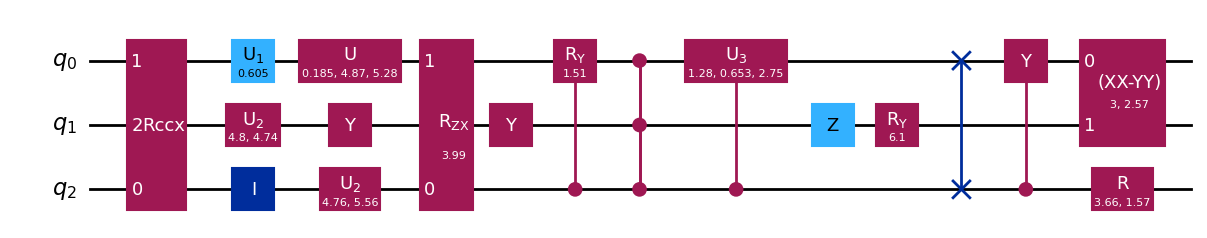

In [21]:
from qiskit.circuit.random import random_circuit

circ = random_circuit(3, 10)
circ.draw(output='mpl')

En el ejemplo de arriba, armamos un circuito de tres qubits de profundidad $10$ (es decir, el número de compuertas que va a tener).

En la función "random_circuit(x, y)", $x$ indica el número de qubits e $y$ la profundidad (número de compuertas).

$\color{blue}{\text{Ejercicio 9}}$: Usar la función "random_circuit()" para jugar y generar distintos circuitos al azar (con distintos números de qubits y profundidades). Diseñar un código que permita extraer el estado generado y el operador correspondiente al circuito. También pueden (opcional) intentar generar un estado de un qubit al azar, y estimarlo con el método de inversión lineal usado arriba.

$\color{green}{\text{AYUDA}}$: Para extraer el estado de un circuito "circ", se puede usar la función "get_statevector(circ)". Se puede correr el curcuito en el simulador definido arriba, correr el circuito con cero shots (job = simulador.run(circ, shots = 0)), extraer el resultado con la función "result()". Algo así como: "result = job.result()" y "outputstate = result.get_statevector(circ)". También es posible extraer la matriz unitaria asociada al circuito con un método similar.

$\color{blue}{\text{Ejercicio 10}}$: Siguiendo una metodología similar a la de ejercicios anteriores, hacer una tomografía del siguiente estado de dos qubits:

$|GHZ\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

$\color{green}{\text{AYUDA 1}}$: Para generar este estado, usar las compuertas $H$ y $Cnot$ actuando en un circuito de dos qubits.

$\color{green}{\text{AYUDA 2}}$: Es posible parametrizar a la matriz densidad de un estado arbitrario de dos qubits teniendo en cuenta que (i) al ser Hermítica, las entradas de la diagonal son números reales que suman uno, y (ii), fuera de la diagonal, el elemento $\rho_{ij}$ es igual a $\rho_{ji}$ conjugado ($\rho_{ij} = \rho_{ji}^{\ast}$). ¿Cuántos parámetros independientes tiene? Usando la regla de Born ($tr(\rho A)$), se puede conectar las entradas de la matriz con los valores medios de los distintos observables que elijan medir. 

$\color{green}{\text{AYUDA 3}}$: Para obtener información tomográficamente completa, podemos medir los valores medios de los siguientes observables:

$$O = \{ \sigma_{x}\otimes I, I\otimes\sigma_{x}, \sigma_{y}\otimes I, I\otimes\sigma_{y}, \sigma_{z}\otimes I, I\otimes\sigma_{z},\\ \sigma_{x}\otimes\sigma_{x}, \sigma_{y}\otimes\sigma_{y}, \sigma_{z}\otimes\sigma_{z}, \sigma_{x}\otimes\sigma_{y}, \sigma_{y}\otimes\sigma_{x},\\ \sigma_{x}\otimes\sigma_{z}, \sigma_{z}\otimes\sigma_{x}, \sigma_{y}\otimes\sigma_{z}, \sigma_{z}\otimes\sigma_{y} \}$$

donde $I$ es la matriz identidad de $2\times2$. ¿Es posible acortar la lista de arriba? ¿Cómo medimos las identidades? ¿Es necesario medirlas?